x

g

omega

y0

C1

omega**2*x/g

C1 + omega**2*x**2/(2*g)

Eq(C1, y0)

{y0}

y0

y0 + omega**2*x**2/(2*g)

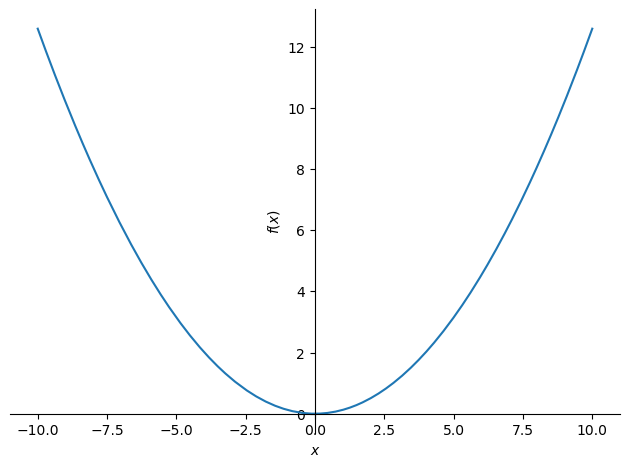

In [10]:
from sympy import *
from IPython.display import display

x, omega, y0, C1 = symbols("x omega y0 C1")
g = symbols("g", positive=True)
display(x, g, omega, y0, C1)

ode_rhs = omega ** 2 * x / g
display(ode_rhs)

dsol = integrate(ode_rhs, x) + C1
display(dsol)

eq1 = Eq(dsol.subs(x, 0), y0)
display(eq1)

sol1 = solveset(eq1, C1)
display(sol1)

C2 = tuple(sol1)[0]
display(C2)

dsol_y0 = dsol.subs(C1, C2)
display(dsol_y0)

ds = dsol_y0.subs({y0: 0, omega: pi/2, g: 9.8})
p1 = plot(ds)


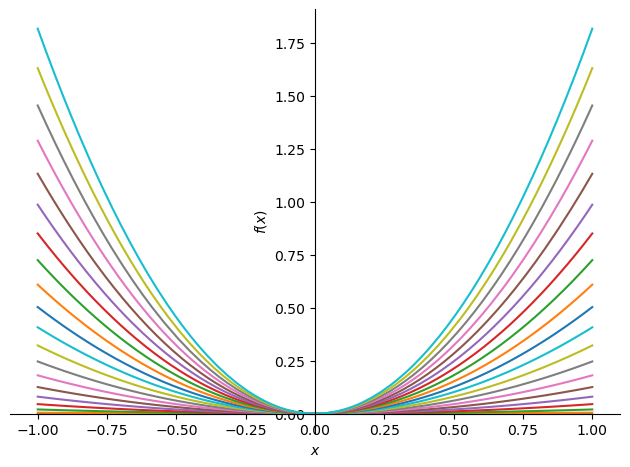

In [12]:
from sympy import *
from IPython.display import display

x, omega, y0, C1 = symbols("x omega y0 C1")
g = symbols("g", positive=True)

ode_rhs = omega ** 2 * x / g

dsol = integrate(ode_rhs, x) + C1

eq1 = Eq(dsol.subs(x, 0), y0)

sol1 = solveset(eq1, C1)

C2 = tuple(sol1)[0]

dsol_y0 = dsol.subs(C1, C2)

ds = dsol_y0.subs({y0: 0, omega: pi/2, g: 9.8})
# p1 = plot(ds)

from numpy import arange
p2 = plot(show = False)
for om in arange(0, 2 * pi, pi / 10):
    ds = dsol_y0.subs({y0:0, omega: om, g: 9.8})
    p = plot(ds, (x, -1, 1), show = False)
    p2.extend(p)
p2.show()
